In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset FinPro.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 4. INSIGHT

### Membuat Kategori MonthlyIncome terhadap Attrition

Pada tahap ini, kami memodifikasi fitur MonthlyIncome menjadi MonthlyIncome_Cat di mana nilai MonthlyIncome dikelompokkan menjadi 3 kategori Low, Medium dan High untuk mempermudah analisis. Hal ini didasarkan pada nilai kuartil 1, 2 dan 3 pada fitur MonthlyIncome.

   MonthlyIncome MonthlyIncome_Cat
0           5993            medium
1           5130            medium
2           2090               low
3           2909               low
4           3468            medium


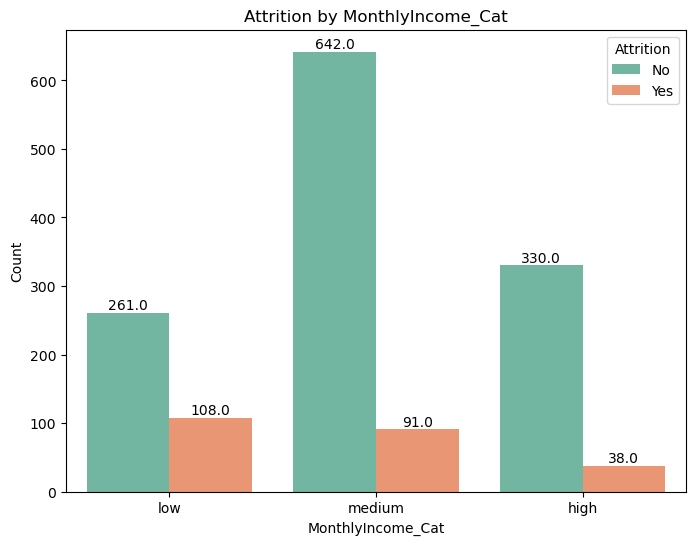

In [3]:
# Menghitung quartile dari kolom 'MonthlyIncome'
income_quartiles = df['MonthlyIncome'].quantile([0.25, 0.5, 0.75])

# Membuat fungsi untuk mengelompokkan nilai MonthlyIncome
def income_category(income):
    if income <= income_quartiles[0.25]:
        return 'low'
    elif income <= income_quartiles[0.75]:
        return 'medium'
    else:
        return 'high'

# Menerapkan fungsi income_category untuk membuat fitur baru 'MonthlyIncome_Cat'
df['MonthlyIncome_Cat'] = df['MonthlyIncome'].apply(income_category)

# Menampilkan hasil
print(df[['MonthlyIncome', 'MonthlyIncome_Cat']].head())

# Menghitung jumlah karyawan dalam setiap kategori MonthlyIncome_Cat dan Attrition
data = df.groupby(['MonthlyIncome_Cat', 'Attrition']).size().reset_index(name='Count')

# Menentukan urutan kategori MonthlyIncome_Cat
category_order = ['low', 'medium', 'high']

# Mengubah tipe data MonthlyIncome_Cat menjadi tipe kategori dengan urutan yang ditentukan
data['MonthlyIncome_Cat'] = data['MonthlyIncome_Cat'].astype('category')
data['MonthlyIncome_Cat'] = data['MonthlyIncome_Cat'].cat.reorder_categories(category_order)

# Membuat visualisasi bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='MonthlyIncome_Cat', y='Count', hue='Attrition', data=data, palette='Set2')

# Menambahkan label angka di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('MonthlyIncome_Cat')
plt.ylabel('Count')
plt.title('Attrition by MonthlyIncome_Cat')
plt.legend(title='Attrition')
plt.show()

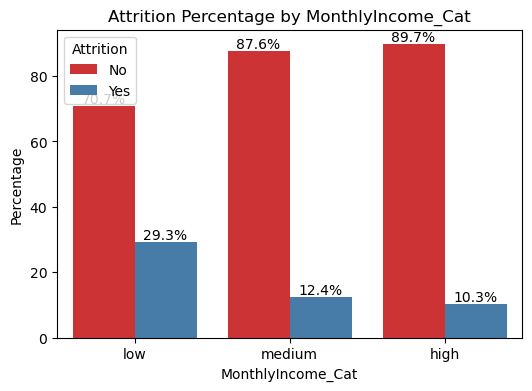

In [4]:
# Menghitung jumlah karyawan dalam setiap kategori MonthlyIncome_Cat dan Attrition
data = df.groupby(['MonthlyIncome_Cat', 'Attrition']).size().reset_index(name='Count')

# Menentukan urutan kategori MonthlyIncome_Cat
category_order = ['low', 'medium', 'high']

# Mengubah tipe data MonthlyIncome_Cat menjadi tipe kategori dengan urutan yang ditentukan
data['MonthlyIncome_Cat'] = data['MonthlyIncome_Cat'].astype('category')
data['MonthlyIncome_Cat'] = data['MonthlyIncome_Cat'].cat.reorder_categories(category_order)

# Menghitung total karyawan dalam setiap kategori MonthlyIncome_Cat
total_counts = data.groupby('MonthlyIncome_Cat')['Count'].sum().reset_index(name='Total')

# Menggabungkan data jumlah karyawan dan total karyawan
data = data.merge(total_counts, on='MonthlyIncome_Cat')

# Menghitung persentase attrition
data['Percentage'] = (data['Count'] / data['Total']) * 100

# Membuat visualisasi bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='MonthlyIncome_Cat', y='Percentage', hue='Attrition', data=data, palette='Set1')

# Menambahkan label angka persentase di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('MonthlyIncome_Cat')
plt.ylabel('Percentage')
plt.title('Attrition Percentage by MonthlyIncome_Cat')
plt.legend(title='Attrition')
plt.show()

Analisis 1:
Berdasarkan visualisasi data MonthlyIncome_Cat vs Attrition menunjukkan bahwa hampir 30% rasio karyawan pada kategori Low Income adalah 'Yes' Attrition. Sementara pada karyawan yang tergolong kategori medium - high monthly income karyawan yang memiliki kecenderungan untuk churn/attrition hanya sebesar 10-12%. Hal ini mengindikasikan bahwa faktor low income mempengaruhi keputusan Attrition pada karyawan.

### Melihat Persebaran Karyawan dengan MonthlyIncome Kategori 'low' pada JobRole terhadap Attrition

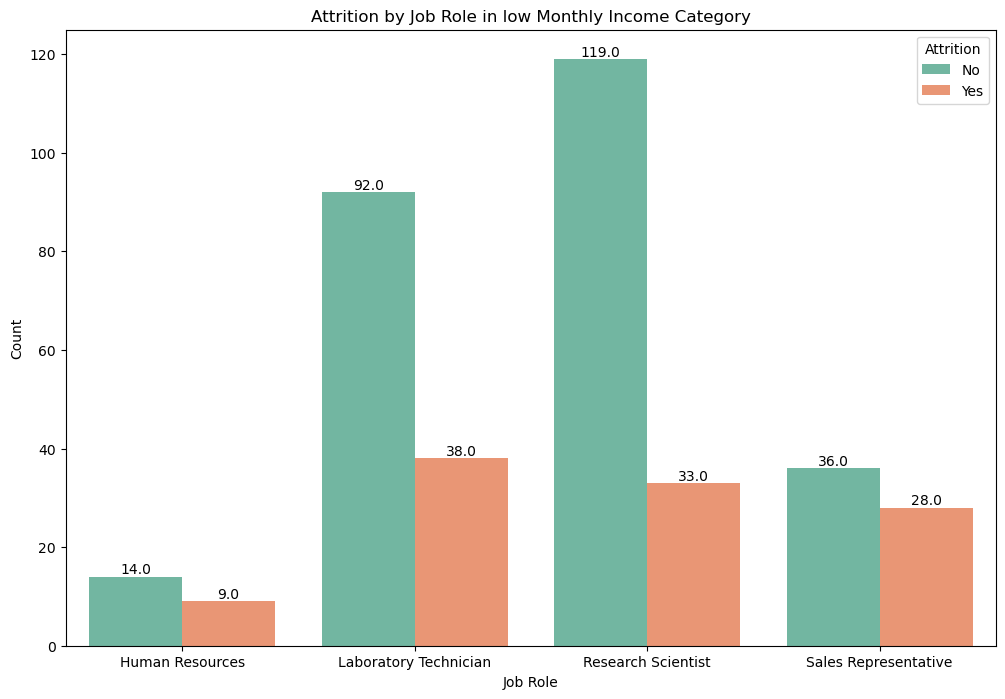

In [5]:
# Filter data hanya untuk kategori 'low' pada kolom 'MonthlyIncome_Cat'
low_income_data = df[df['MonthlyIncome_Cat'] == 'low']

# Menghitung jumlah karyawan dalam setiap kombinasi 'JobRole' dan 'Attrition' di kategori 'low' MonthlyIncome_Cat
jobrole_attrition_counts = low_income_data.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')

# Membuat visualisasi bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='JobRole', y='Count', hue='Attrition', data=jobrole_attrition_counts, palette='Set2')

# Menambahkan label angka di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Attrition by Job Role in low Monthly Income Category')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.show()

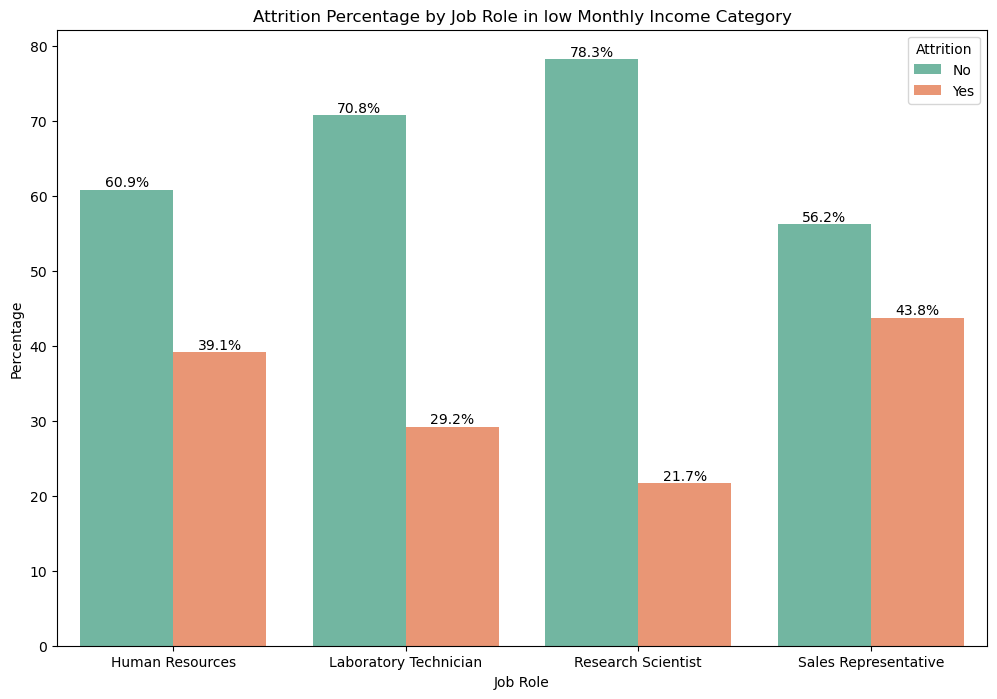

In [6]:
# Filter data hanya untuk kategori 'low' pada kolom 'MonthlyIncome_Cat'
low_income_data = df[df['MonthlyIncome_Cat'] == 'low']

# Menghitung jumlah karyawan dalam setiap kombinasi 'JobRole' dan 'Attrition' di kategori 'low' MonthlyIncome_Cat
jobrole_attrition_counts = low_income_data.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')

# Menghitung total karyawan di setiap 'JobRole' di kategori 'low' MonthlyIncome_Cat
jobrole_totals = jobrole_attrition_counts.groupby('JobRole')['Count'].sum().reset_index(name='Total')

# Menggabungkan data untuk mendapatkan persentase Attrition di setiap 'JobRole'
jobrole_attrition_counts = jobrole_attrition_counts.merge(jobrole_totals, on='JobRole', suffixes=('', '_Total'))
jobrole_attrition_counts['Percentage'] = jobrole_attrition_counts['Count'] / jobrole_attrition_counts['Total'] * 100

# Membuat visualisasi bar chart dengan persentase
plt.figure(figsize=(12, 8))
sns.barplot(x='JobRole', y='Percentage', hue='Attrition', data=jobrole_attrition_counts, palette='Set2')

# Menambahkan label persentase di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Job Role')
plt.ylabel('Percentage')
plt.title('Attrition Percentage by Job Role in low Monthly Income Category')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.show()

### Analisis 2: ###
Persebaran karyawan dengan kategori low MonthlyIncome berdasarkan JobRole menunjukkan bahwa jumlah karyawan dengan low MonthlyIncome adalah karyawan Laboratory Technician sebanyak 38 orang. Sementara secara rasio, karyawan Sales Representative adalah yang tertinggi yaitu sebesar 43.8% yang berisiko untuk Attrition.

### Fitur Age_Cat dihubungkan dengan JobRole, 'low' MonthlyIncome dan Attrition

In [7]:
# Menentukan jumlah kelas usia yang diinginkan
num_bins = 3

# Menghitung rentang usia yang akan digunakan
age_range = pd.cut(df['Age'], bins=num_bins, precision=0)

# Menambahkan fitur baru 'Age_Cat' ke dalam dataset
df['Age_Cat'] = age_range.astype(str)

# Menampilkan hasil
print(df[['Age', 'Age_Cat']].head())

   Age       Age_Cat
0   41  (32.0, 46.0]
1   49  (46.0, 60.0]
2   37  (32.0, 46.0]
3   33  (32.0, 46.0]
4   27  (18.0, 32.0]


C:\Users\HP\anacondanavi\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


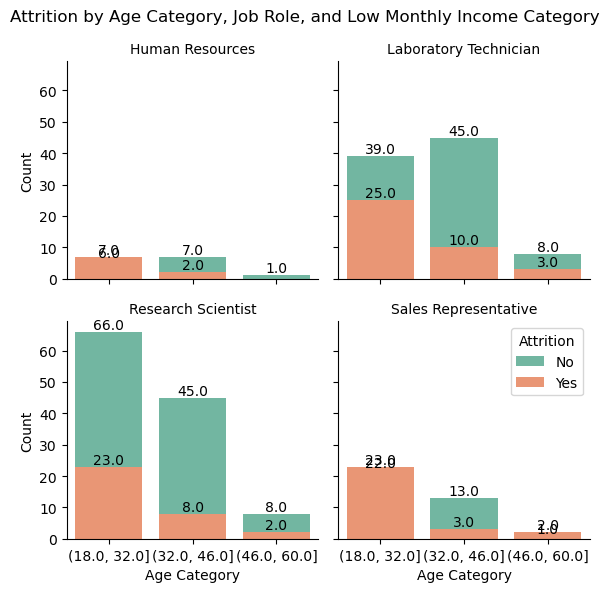

In [8]:
# Filter data untuk kategori 'low' pada kolom 'MonthlyIncome_Cat'
low_income_data = df[df['MonthlyIncome_Cat'] == 'low']

# Menghitung jumlah karyawan dalam setiap kombinasi 'Age_Cat', 'JobRole', dan 'Attrition' di kategori 'low' MonthlyIncome_Cat
age_jobrole_attrition_counts = low_income_data.groupby(['Age_Cat', 'JobRole', 'Attrition']).size().reset_index(name='Count')

# Mengatur tampilan visualisasi dengan facetgrid
g = sns.FacetGrid(age_jobrole_attrition_counts, col='JobRole', col_wrap=2, hue='Attrition', palette='Set2')
g.map(sns.barplot, 'Age_Cat', 'Count')

# Menambahkan label pada setiap subplot
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Menyesuaikan tampilan
g.set_axis_labels('Age Category', 'Count')
g.set_titles('{col_name}')

# Menambahkan legend dan mengatur posisinya
plt.legend(title='Attrition', loc='upper right')

plt.suptitle('Attrition by Age Category, Job Role, and Low Monthly Income Category')
plt.tight_layout()
plt.show()

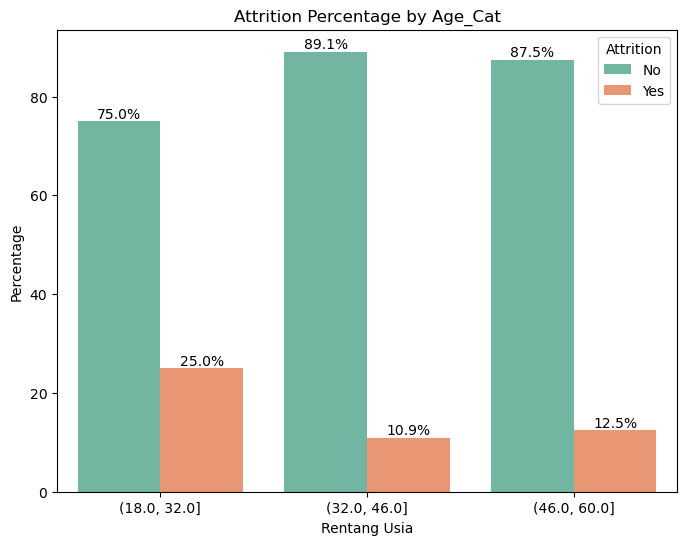

In [9]:
# Menentukan jumlah kelas usia yang diinginkan
num_bins = 3

# Menghitung rentang usia yang akan digunakan
age_range = pd.cut(df['Age'], bins=num_bins, precision=0)

# Menambahkan fitur baru 'Age_Cat' ke dalam dataset
df['Age_Cat'] = age_range.astype(str)

# Menghitung jumlah karyawan dalam setiap kategori Age_Cat dan Attrition
data = df.groupby(['Age_Cat', 'Attrition']).size().reset_index(name='Count')

# Menghitung total karyawan dalam setiap kategori Age_Cat
total_counts = data.groupby('Age_Cat')['Count'].sum().reset_index(name='Total')

# Menggabungkan data jumlah karyawan dan total karyawan
data = data.merge(total_counts, on='Age_Cat')

# Menghitung persentase attrition
data['Percentage'] = (data['Count'] / data['Total']) * 100

# Membuat visualisasi bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Cat', y='Percentage', hue='Attrition', data=data, palette='Set2')

# Menambahkan label angka persentase di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Rentang Usia')
plt.ylabel('Percentage')
plt.title('Attrition Percentage by Age_Cat')
plt.legend(title='Attrition')
plt.show()

### Analisis 3: ###
- Berdasarkan visualisasi di atas, diketahui bahwa karyawan pada kelompok rentang usia 18-32 tahun dengan MonthlyIncome kategori low pada semua JobRole cenderung 'Yes' Attrition. 
- Pada JobRole Sales Representative didapatkan fakta bahwa dari 22 karyawan rentang usia 18-32 tahun, 100% positif Attrition atau semua karyawan memilih 'Yes' Attrition pada rentang usia ini.

## Rekomendasi: ##
- Perlu evaluasi pada pemberian gaji khususnya untuk posisi pekerjaan Sales Representative dan Human Resource. Karena kedua job role ini merupakan job role dengan rasio karyawan yang tertinggi memilih 'Yes' Attrition.
- Job role yang berorientasi pada target seperti Sales Representative dan Human Resource perlu dilakukan evaluasi target dan beban kerja. Karena data menunjukkan pada kedua job role ini, karyawan dengan rentang usia 18-32 tahun cenderung memilih 'Yes' Attrition. Karyawan pada rentang usia ini tergolong gen Z dan Millenials, yang mana kompensasi menjadi motivasi utama mereka dalam bekerja. Berdasarkan penelitian Hanifah & Wardono (2020), "Insentif (uang) adalah motivasi penting; oleh karena itu, mereka bersedia bekerja keras dan dipindahkan untuk mendapatkan kesempatan kerja yang layak". Terlebih lagi, dikatakan bahwa generasi Z dan millenials bersikap realistis serta membutuhkan keamanan dan stabilitas, sehingga cenderung mencari pekerjaan yang memberikan gaji sesuai dengan job desc(Dwidienawati & Gandasari, 2018).

## MORE INSIGHTS.. ##

### Melihat Persentase Perbandingan Feature Relationship Satisfaction terhadap Attrition


Pada feature RelationshipSatisfaction, kami membuat visualisasi antar value category dan membuat persentase perbandingan masing-masing kategori value terhadap feature attrition karyawan. Kategori terbagi atas 4, yaitu 1 yang didfenisikan sebagai kategori Low, 2 didefenisikan sebagai kategori Medium, 3 didefenisikan sebagai kategori High dan 4 didefenisikan sebagai kategori Very High.

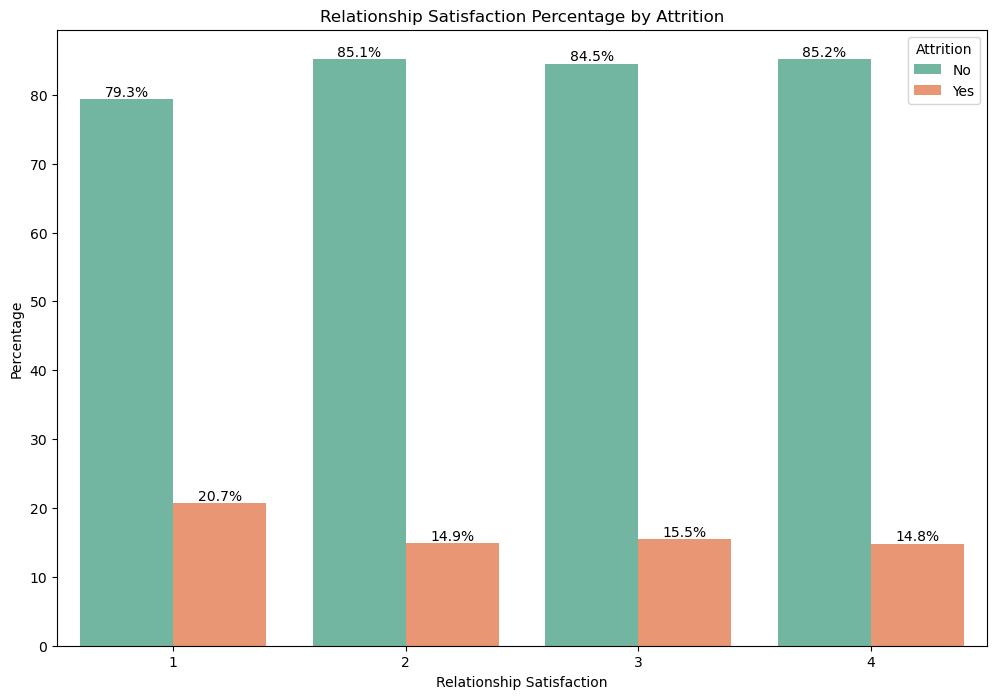

In [10]:
relation_counts = df.groupby(['RelationshipSatisfaction', 'Attrition']).size().reset_index(name='Count')
total_relation = relation_counts.groupby('RelationshipSatisfaction')['Count'].sum().reset_index(name='Total')
relation_counts = relation_counts.merge(total_relation, on='RelationshipSatisfaction')
relation_counts['Percentage'] = (relation_counts['Count'] / relation_counts['Total']) * 100

# Membuat visualisasi bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='RelationshipSatisfaction', y='Percentage', hue='Attrition', data=relation_counts, palette='Set2')

# Menambahkan label angka persentase di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Relationship Satisfaction')
plt.ylabel('Percentage')
plt.title('Relationship Satisfaction Percentage by Attrition')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.show()

### Analisis 4: ###
- Berdasarkan visualisasi di atas, diketahui bahwa karyawan pada kategori 1 yang terdefenisi sebagai Low Satisfied memiliki persentasi 'Yes' Attrition tertinggi dari kategori lainnya yaitu sebesar 20.7%. Hal ini berarti tingkat kepuasan karyawan yang rendah terhadap hubungan maupun lingkungan kerja diperusahaan mereka cukup mempengaruhi keputusan karyawan untuk memilih 'Yes' Attrition pada kategori ini meskipun persentasi terhadap karyawan yang memilih 'No' Attrition jauh lebih dominan.
- 

## Rekomendasi: ##
- 
-